In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
def read_img(url, grey=False):
    """
    Metodo que carga la imagen.
    Parameters
    ----------
    url : string 
        ruta donde se encuentra la imagen.
    grey : boolean
        valor que indica si se lee la imagen a color o en blanco y negro
    Returns
    ----------
    Retorna la imagen en formato RGB
    """
    image = cv2.imread(url,cv2.IMREAD_UNCHANGED)#cv2.IMREAD_UNCHANGED
    if grey:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# COLOR_BGR2GRAY/COLOR_BGR2RGB
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


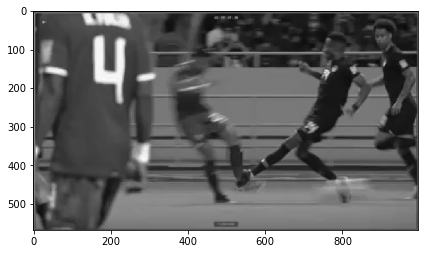

In [3]:
test = read_img("../datasets/imgs-falta/VAR1.PNG",grey=True)
io.imshow(test)


## Watherfall

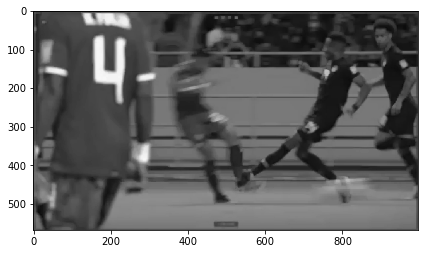

In [4]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(test, cv2.MORPH_OPEN, kernel, iterations=2)
io.imshow(opening)

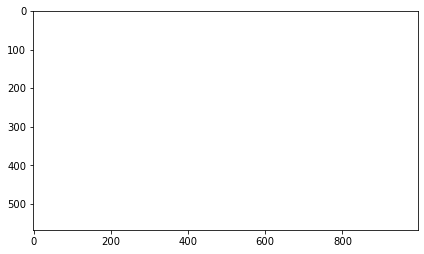

In [5]:
distance_transform = cv2.distanceTransform(opening, cv2.DIST_L2, maskSize=5)
_, foreground = cv2.threshold(distance_transform, 0.7 * distance_transform.max(), 255, 0)
foreground = np.uint8(foreground)
io.imshow(foreground)

## Split and merge

In [6]:
# split 
def Division_Judge(img, h0, w0, h, w) :
    area = img[h0 : h0 + h, w0 : w0 + w]
    mean = np.mean(area)
    std = np.std(area, ddof = 1)

    total_points = 0
    operated_points = 0

    for row in range(area.shape[0]) :
        for col in range(area.shape[1]) :
            if (area[row][col] - mean) < 2 * std :
                operated_points += 1
            total_points += 1

    if operated_points / total_points >= 0.95 :
        return True
    else :
        return False

def Merge(img, h0, w0, h, w) :
    # area = img[h0 : h0 + h, w0 : w0 + w]
    # _, thresh = cv.threshold(area, 0, 255, cv.THRESH_OTSU + cv.THRESH_BINARY_INV)
    # img[h0 : h0 + h, w0 : w0 + w] = thresh
    for row in range(h0, h0 + h) :
        for col in range(w0, w0 + w) :
            if img[row, col] > 100 and img[row, col] < 200:
                img[row, col] = 0
            else :
                img[row, col] = 255

def Recursion(img, h0, w0, h, w) :
    # If the splitting conditions are met, continue to split 
    if not Division_Judge(img, h0, w0, h, w) and min(h, w) > 5 :
        # Recursion continues to determine whether it can continue to split 
        # Top left square 
        Division_Judge(img, h0, w0, int(h0 / 2), int(w0 / 2))
        # Upper right square 
        Division_Judge(img, h0, w0 + int(w0 / 2), int(h0 / 2), int(w0 / 2))
        # Lower left square 
        Division_Judge(img, h0 + int(h0 / 2), w0, int(h0 / 2), int(w0 / 2))
        # Lower right square 
        Division_Judge(img, h0 + int(h0 / 2), w0 + int(w0 / 2), int(h0 / 2), int(w0 / 2))
    else :
        # Merge 
        Merge(img, h0, w0, h, w)

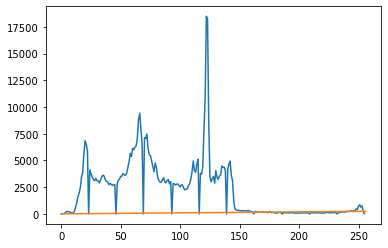

In [7]:
hist, bins = np.histogram(opening, bins = 256)
plt.plot(hist)
plt.plot(bins)
plt.show()

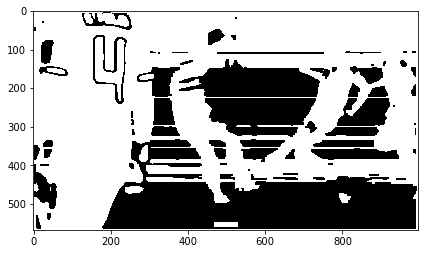

In [8]:
segemented_img = opening.copy()
Recursion(segemented_img, 0, 0, segemented_img.shape[0], segemented_img.shape[1])
io.imshow(segemented_img)

## K-means

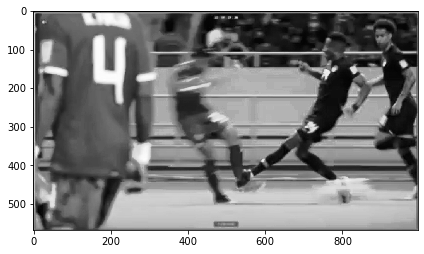

In [9]:
test_2 = read_img("../datasets/imgs-falta/procesada_1.png",grey=True)
io.imshow(test_2)

(567, 995)
(188055, 3)


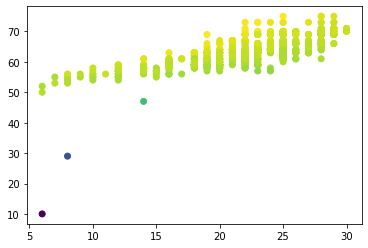

In [10]:
print(test_2.shape)
twoDimage = test_2.reshape((-1,3))
twoDimage = np.float32(twoDimage)
print(twoDimage.shape)
plt.scatter(test_2[1],test_2[2],c=test_2[3])

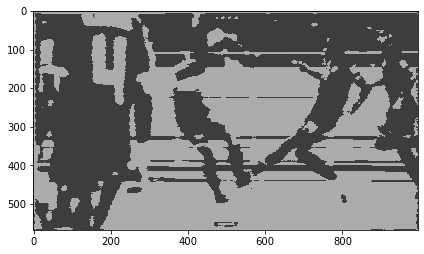

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((test_2.shape))
io.imshow(result_image)

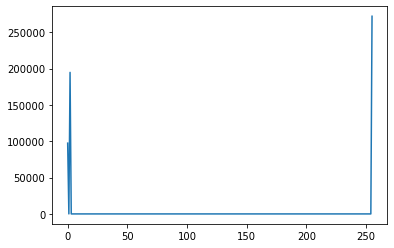

In [142]:
hist, bins = np.histogram(result_image,256)
plt.plot(hist)

C:\Users\edque\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


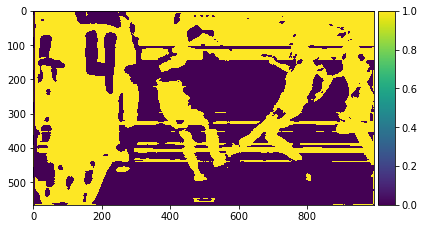

In [144]:
stagg_func_K = lambda p: 1 if p < 100 else 0
vfunc = np.vectorize(stagg_func_K,otypes=[np.uint8])
segment_kmeans = vfunc(result_image)
io.imshow(segment_kmeans)

## GVF 

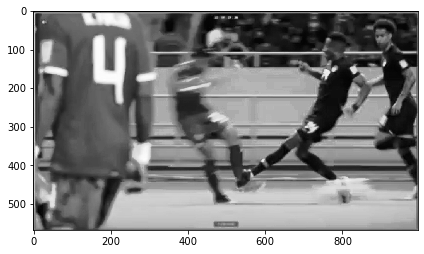

In [24]:
test_3 = read_img("../datasets/imgs-falta/procesada_1.png",grey=True)
io.imshow(test_3)

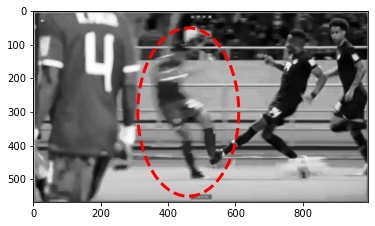

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = test_3
plt.imshow(img, cmap=plt.cm.gray)
s = np.linspace(0, 2*np.pi, 400)
r = 300 + 250*np.sin(s)#altura up< down> 
c = 460 + 150*np.cos(s)#horizontalidad left< right>
init = np.array([r, c]).T
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
plt.show()


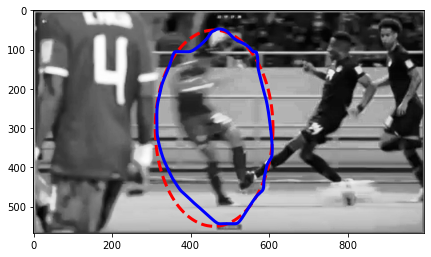

In [128]:
snake = active_contour(gaussian(img),init)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
#ax.set_xticks([]), ax.set_yticks([])
#ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

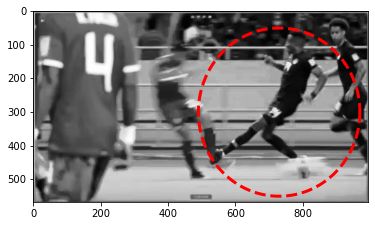

In [126]:
img = test_3
plt.imshow(img, cmap=plt.cm.gray)
s2 = np.linspace(0, 2*np.pi, 400)
r2 = 300 + 250*np.sin(s)#altura up< down> 
c2 = 730 + 240*np.cos(s)#horizontalidad left< right>
init2 = np.array([r2, c2]).T
plt.plot(init2[:, 1], init2[:, 0], '--r', lw=3)
plt.show()

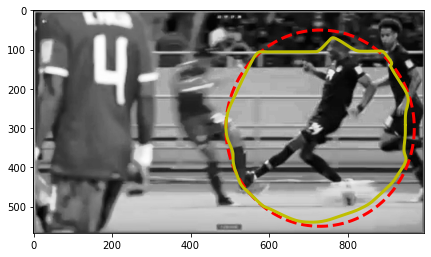

In [134]:
snake2 = active_contour(gaussian(img),init2)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init2[:, 1], init2[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-y', lw=3)
#ax.set_xticks([]), ax.set_yticks([])
#ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

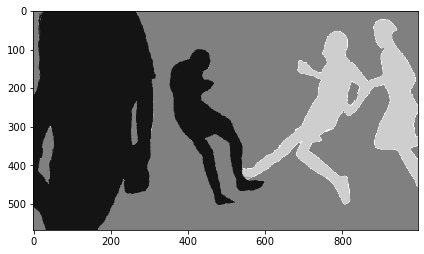

In [136]:
gt_1 = read_img("../datasets/imgs-falta/GT1.png",grey=False)[:,:,0]
io.imshow(gt_1)

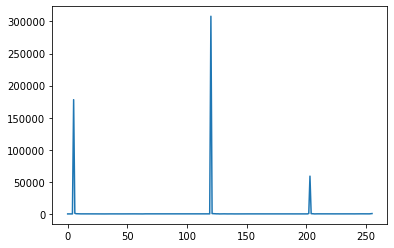

In [170]:
hist, bins = np.histogram(gt_1,256)
plt.plot(hist)

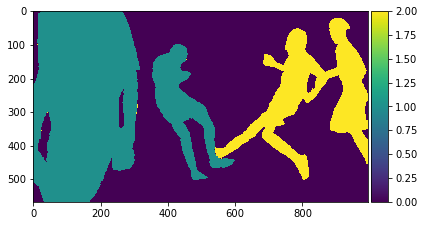

In [117]:
stagg_func = lambda p: 1 if p < 100 else (0 if p < 150 else 2)
vfunc = np.vectorize(stagg_func,otypes=[np.uint8])
GT1 = vfunc(gt_1)
io.imshow(GT1)

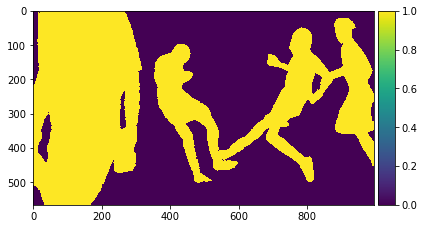

In [148]:
stagg_func = lambda p: 1 if p < 100 or p >150 else 0
vfunc = np.vectorize(stagg_func,otypes=[np.uint8])
GT2 = vfunc(gt_1)
io.imshow(GT2)

In [150]:
#io.imshow(segment_kmeans)
#io.imshow(GT2)
print(segment_kmeans.shape)
print(GT2.shape)

(567, 995)
(567, 995)


In [165]:
def get_metrics(img,gt):
    h,w = gt.shape
    tp,tn,fp,fn = 0,0,0,0
    for i in range(h):
        for j in range(w):
            if img[i,j] == gt[i,j]:
                if gt[i,j] == 0:
                    tn = tn+1
                else:
                    tp = tp+1 
            else:
                if gt[i,j] == 0:
                    fp = fp+1
                else:
                    fn = fn+1 
    d = {'back': [tp, fp], 'per': [fn, tn]}
    df = pd.DataFrame(data=d)
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    acurracy= (tp+tn)/(tp+tn+fn+fp)
    f1 = (2*tp)/(2*tp+fp+fn)
    return df, acurracy, precision, recall, f1

In [167]:
df, acurracy, precision, recall, f1 =get_metrics(segment_kmeans,GT2)
df

,back,per
0,191849,59835
1,100309,212172


In [168]:
print("recall: ",recall)
print("precision: ",precision)
print("acurracy: ",acurracy)
print("f1:",f1)

recall:  0.762261407161361
precision:  0.6566618062829017
acurracy:  0.7161397818014233
f1: 0.705532121461748
